<a href="https://colab.research.google.com/github/Soham-Gaonkar/PreRequisiteTest_ML/blob/main/PreRequisiteTest_SohamGaonkar_23110314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

###1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans.)Let A be a (n,k) matrix and let B be a (k,m) matrix , where an element in the p th row and q th column of matrix A is given by $a_{pq}$ and similarly for matrix B.<br>
So on matrix multiplication (A X B) we get a  resulting matrix C of dimensions (n,m) such that :

$$ c_{ij}= \sum_{x=1}^k a_{ix}b_{xj} $$

Since each element of C requires (k-1) addition steps and k multiplication steps.And in total there are n$\cdot$m elements , hence there are
n$\cdot$m$\cdot$(k-1) additions , n$\cdot$m$\cdot$(k) multiplications

###2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

list_times =[]
numpy_times =[]
order =[]

def matmultiply(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += (A[i][k] * B[k][j])
    return C

def compare(n):
  A = np.random.rand(int(10**n), int(10**n))
  B = np.random.rand(int(10**n), int(10**n))

  start_time = time.time()
  result_list = matmultiply(A, B)
  end_time = time.time()
  list_time = end_time - start_time

  np_A = np.array(A)
  np_B = np.array(B)


  start_time = time.time()
  result_numpy = np.dot(np_A, np_B)
  end_time = time.time()
  numpy_time = end_time - start_time

  print("Number of multiplication steps: 10 ^",3*n, "Time taken using list: ",list_time," Time taken using numpy: ",numpy_time)

  list_times.append(list_time)
  numpy_times.append(numpy_time)

compare(0)
compare(1)
compare(2)

Number of multiplication steps: 10 ^ 0 Time taken using list:  4.553794860839844e-05  Time taken using numpy:  1.8358230590820312e-05
Number of multiplication steps: 10 ^ 3 Time taken using list:  0.0014920234680175781  Time taken using numpy:  0.00010752677917480469
Number of multiplication steps: 10 ^ 6 Time taken using list:  0.999525785446167  Time taken using numpy:  0.00028228759765625


NumPy uses optimized libraries like BLAS (Basic Linear Algebra Subprograms) that include high-performance implementations of matrix multiplication algorithms, such as Strassen's method.

###3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Ans.) Using this method,since we need n/2 passes ,time complexity of finding the median of the array requires O($n^2$) time complexity.(Bubble Sort)<br>
We can sort the array using Merge Sort or Quick Sort to obtain median with time complexity O($nlogn$), but this isn't the fastest way to find the median of the array ,<br>
Faster method can be using quick select which has an average time complexity of O($n$).

numpy.median uses introselect ( variant of quick select)  , and hence has a time complexity of O($n$).

In [5]:
arr1 = np.random.randint(0, 1000, size=(100))

In [6]:
#Method 1: Bubble Sort

import numpy as np
import time

arr = arr1

def bubble_sort():
  n = len(arr)
  for i in range(n):
      for j in range(n - i - 1):
          if arr[j] > arr[j + 1]:
              arr[j], arr[j + 1] = arr[j + 1], arr[j]


  if n%2 == 0:
      median = (arr[n//2 - 1] + arr[n//2])/2
  else:
      median = arr[n//2]

  return median

arr = arr1

start_time = time.time()
median = bubble_sort()
end_time = time.time()
timetaken = end_time - start_time

print("Median:",median)
print("Time taken:",timetaken)


Median: 409.5
Time taken: 0.005524158477783203


In [7]:
#Method 2 : Quick Select
import numpy as np
import random
import time

def partition(arr, low, high):
    pivot = arr[high]
    i = low
    for j in range(low, high):
        if arr[j] <= pivot:
            arr[i],arr[j] = arr[j],arr[i]
            i +=1
    arr[i],arr[high] = arr[high],arr[i]
    return i

def quickselect(arr, low, high, k):
    if low == high:
        return arr[low]

    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]

    index = partition(arr, low, high)

    if k == index:
        return arr[k]
    elif k < index:
        return quickselect(arr, low, index-1, k)
    else:
        return quickselect(arr, index+1, high, k)

def median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n-1, n//2)
    else:
        leftmid = quickselect(arr, 0, n-1, n//2 - 1)
        rightmid = quickselect(arr, 0, n-1, n//2)
        return (leftmid + rightmid)/2

start_time = time.time()
median = median_quickselect(arr.copy())
end_time = time.time()
timetaken = end_time - start_time

print("Median:", median)
print("Time taken:", timetaken)


Median: 409.5
Time taken: 0.0007841587066650391


In [8]:
# Using numpy.median
import numpy as np

arr = arr1

# print("Array:",arr)

start_time = time.time()
median = (np.median(arr))
end_time = time.time()
time_taken = end_time - start_time

print("Median:",median)
print("Time taken:",timetaken)

Median: 409.5
Time taken: 0.0007841587066650391


##4. What is the gradient of the following function with respect to x and y? $x^2y + y^3 sin(x)$


$ f(x,y) = x^2y + y^3 sin(x)$ ,then

$$
\frac{\partial f}{\partial x} = \frac{\partial (x^2 y + y^3 \sin(x))}{\partial x}
$$
$$
\begin{aligned}
&= \frac{\partial (x^2 y)}{\partial x} + \frac{\partial (y^3 \sin(x))}{\partial x} \\
&= 2xy + y^3 \cos(x)
\end{aligned}
$$
<br><br>
$$
\frac{\partial f}{\partial y} = \frac{\partial (x^2 y + y^3 \sin(x))}{\partial y}
$$
$$
\begin{aligned}
&= \frac{\partial (x^2 y)}{\partial y} + \frac{\partial (y^3 \sin(x))}{\partial y} \\
&= x^2 + 3y^2 \sin(x)
\end{aligned}
$$

##5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [9]:
import jax
import numpy as np
import jax.numpy as jnp

def f(x, y):
    return (x**2)*y + (y**3)*jnp.sin(x)

df_dx = jax.grad(f, argnums=0) # gradient wrt x
df_dy = jax.grad(f, argnums=1) # gradient wrt y

x = 5.0
y = 2.0

df_dx_val = df_dx(x, y)
df_dy_val = df_dy(x, y)

print(f"At (x, y) = ({x}, {y})")

print("Analytical :")
df_dx = (2*x*y) + (y**3*np.cos(x))
df_dy = (x**2) + (2*(y**2)*np.sin(x))
print(f"df/dx = {df_dx_val}")
print(f"df/dy = {df_dy_val}")

print("Using JAX:")
print(f"df/dx = {df_dx_val}")
print(f"df/dy = {df_dy_val}")


At (x, y) = (5.0, 2.0)
Analytical :
df/dx = 22.269298553466797
df/dy = 13.492908477783203
Using JAX:
df/dx = 22.269298553466797
df/dy = 13.492908477783203


##6. Use sympy to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sp

x, y = sp.symbols('x y')
f = (x**2)*y + (y**3)*sp.sin(x) # defining function

df_dx = sp.diff(f, x) # calculates analytical fn - partial differentiation
df_dy = sp.diff(f, y)

print("df/dx:",df_dx)
print("df/dy:", df_dy)

x_val = 1.0
y_val = 2.0

df_dx_val = df_dx.evalf(subs={x: x_val, y: y_val}) # substitutes value
df_dy_val = df_dy.evalf(subs={x: x_val, y: y_val})

print(f"At (x, y) = ({x_val}, {y_val})")
print("df/dx =", df_dx_val)
print("df/dy = ",df_dy_val)

df/dx: 2*x*y + y**3*cos(x)
df/dy: x**2 + 3*y**2*sin(x)
At (x, y) = (1.0, 2.0)
df/dx = 8.32241844694512
df/dy =  11.0976518176948


##7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
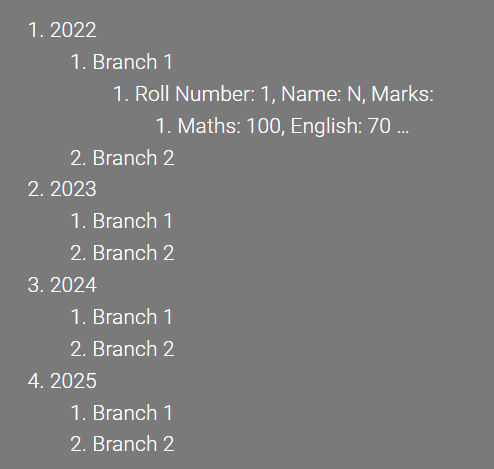

In [11]:


student_info = {
    2022: {
        "CSE": [
            {"Roll Number": 1, "Name": "A", "Marks": {"Maths": 100, "English": 70, "Science": 90}},
            {"Roll Number": 2, "Name": "B", "Marks": {"Maths": 90, "English": 80, "Science": 90}},
            {"Roll Number": 3, "Name": "C", "Marks": {"Maths": 100, "English": 90, "Science": 90}}
        ],
        "EE": [
            {"Roll Number": 4, "Name": "D", "Marks": {"Maths": 100, "English": 70, "Science": 90}},
            {"Roll Number": 5, "Name": "E", "Marks": {"Maths": 90, "English": 80, "Science": 90}}
        ]
    },
    2023: {
        "CSE": [
            {"Roll Number": 1, "Name": "A", "Marks": {"Maths": 100, "English": 70, "Science": 90}},
            {"Roll Number": 2, "Name": "B", "Marks": {"Maths": 90, "English": 80, "Science": 90}},
            {"Roll Number": 3, "Name": "C", "Marks": {"Maths": 100, "English": 90, "Science": 90}}
        ],
        "EE": [
            {"Roll Number": 4, "Name": "D", "Marks": {"Maths": 100, "English": 70, "Science": 90}},
            {"Roll Number": 5, "Name": "E", "Marks": {"Maths": 90, "English": 80, "Science": 90}}
        ]
    }
}


##8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [12]:
# i am using __repr__ method  to provide a string representation for each class

class Marks:

    def __init__(self, maths, english, science):
        self.maths = maths
        self.english = english
        self.science = science

    def __repr__(self):
        return f"Maths: {self.maths}, English: {self.english}, Science: {self.science}"

class Student:

    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: [{self.marks}]"


class Branch:

    def __init__(self, name):
        self.name = name
        self.students = [] # list of  students

    def add_student(self, student):
        self.students.append(student) # add a student in a branch

    def __repr__(self):
        return f"Branch: {self.name}, Students: {self.students}"


class Year:

    def __init__(self, year):
        self.year = year
        self.branches = [] # list of  branches

    def add_branch(self, branch):
        self.branches.append(branch) # add a branch to a year

    def __repr__(self):
        return f"Year: {self.year}, Branches: {self.branches}"


class Database:

    def __init__(self):
        self.years = [] # list of years

    def add_year(self, year):
        self.years.append(year) # add year to the databse

    def __repr__(self):
        return f"Database: {self.years}"


In [13]:
database = Database()


year_2022 = Year(2022)

cse_2022 = Branch("CSE")
cse_2022.add_student(Student(1, "A", Marks(100, 70, 90)))
cse_2022.add_student(Student(2, "B", Marks(90, 80, 90)))
cse_2022.add_student(Student(3, "C", Marks(100, 90, 90)))

ee_2022 = Branch("EE")
ee_2022.add_student(Student(4, "D", Marks(100, 70, 90)))
ee_2022.add_student(Student(5, "E", Marks(90, 80, 90)))

year_2022.add_branch(cse_2022)
year_2022.add_branch(ee_2022)

database.add_year(year_2022)




year_2023 = Year(2023)

cse_2023 = Branch("CSE")
cse_2023.add_student(Student(1, "A", Marks(100, 70, 90)))
cse_2023.add_student(Student(2, "B", Marks(90, 80, 90)))
cse_2023.add_student(Student(3, "C", Marks(100, 90, 90)))

ee_2023 = Branch("EE")
ee_2023.add_student(Student(4, "D", Marks(100, 70, 90)))
ee_2023.add_student(Student(5, "E", Marks(90, 80, 90)))

year_2023.add_branch(cse_2023)
year_2023.add_branch(ee_2023)

database.add_year(year_2023)



print(database)


Database: [Year: 2022, Branches: [Branch: CSE, Students: [Roll Number: 1, Name: A, Marks: [Maths: 100, English: 70, Science: 90], Roll Number: 2, Name: B, Marks: [Maths: 90, English: 80, Science: 90], Roll Number: 3, Name: C, Marks: [Maths: 100, English: 90, Science: 90]], Branch: EE, Students: [Roll Number: 4, Name: D, Marks: [Maths: 100, English: 70, Science: 90], Roll Number: 5, Name: E, Marks: [Maths: 90, English: 80, Science: 90]]], Year: 2023, Branches: [Branch: CSE, Students: [Roll Number: 1, Name: A, Marks: [Maths: 100, English: 70, Science: 90], Roll Number: 2, Name: B, Marks: [Maths: 90, English: 80, Science: 90], Roll Number: 3, Name: C, Marks: [Maths: 100, English: 90, Science: 90]], Branch: EE, Students: [Roll Number: 4, Name: D, Marks: [Maths: 100, English: 70, Science: 90], Roll Number: 5, Name: E, Marks: [Maths: 90, English: 80, Science: 90]]]]


##9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
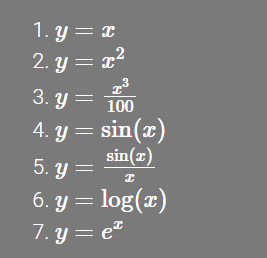

<ipython-input-14-d31e097fb800>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


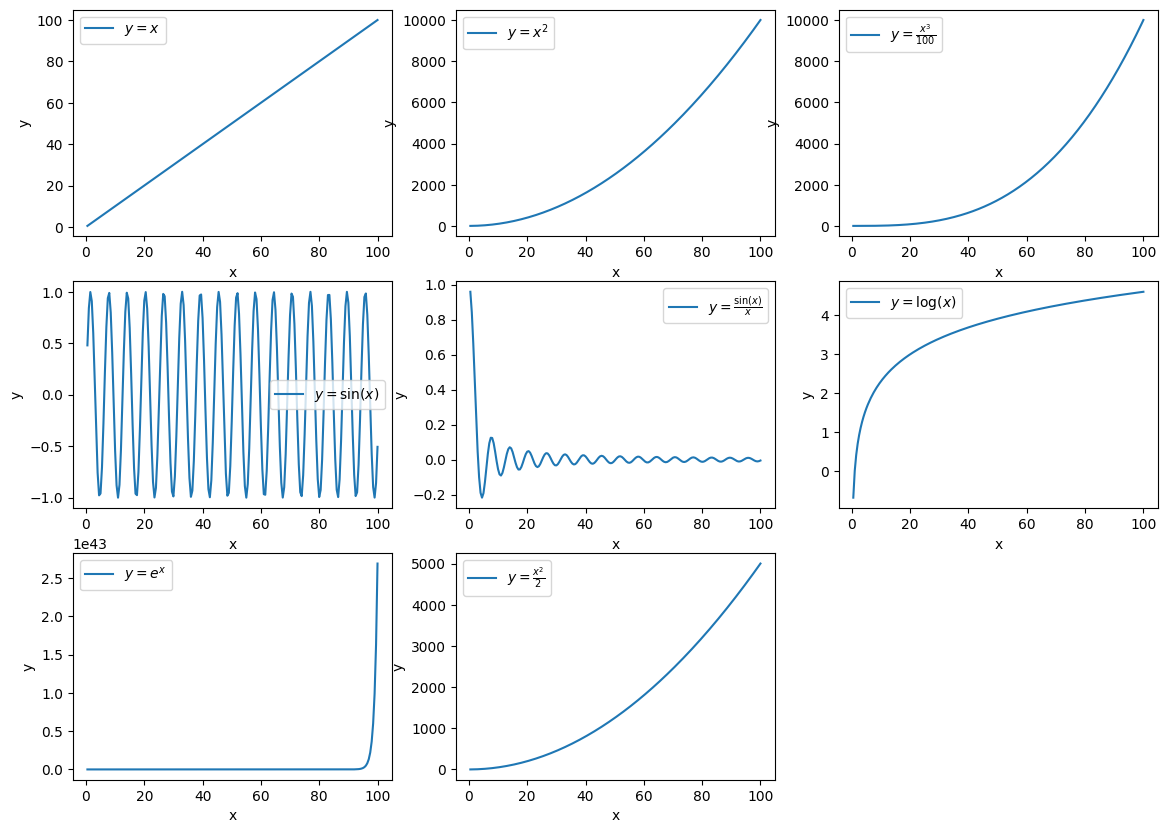

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.1, 0.5)

# functions to be plotted
y1 = x
y2 = x**2
y3 = x**3/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)
y8 = x**2/2

plt.figure(figsize=(14, 10))

plt.title('Plot of the given functions')

plt.subplot(3,3,1)
plt.plot(x, y1, label='$y = x$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,2)
plt.plot(x, y2, label='$y = x^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3,3)
plt.plot(x, y3, label='$y = \\frac{x^3}{100}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3,4)
plt.plot(x, y4, label='$y = \sin(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,5)
plt.plot(x, y5, label='$y = \\frac{\sin(x)}{x}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3,6)
plt.plot(x, y6, label='$y = \log(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,7)
plt.plot(x, y7, label='$y = e^x$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(3,3,8)
plt.plot(x, y8, label='$y = \\frac{x^2}{2}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


plt.show()


##10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [15]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1,high =2 ,size=(20,5)) # generates matrix
# print(matrix)

df = pd.DataFrame(matrix,columns=['a','b','c','d','e']) # converted to df
display(df)

col = df.std().idxmax() # finds highest std column
row = df.mean(axis=1).idxmin() # finds lowest mean row

print('column:',col,'row:',row)

,a,b,c,d,e
0,1.653490,1.263214,1.697296,1.804700,1.704739
1,1.995765,1.839372,1.849605,1.696789,1.337857
2,1.147390,1.576149,1.137984,1.184907,1.678096
3,1.517387,1.605698,1.120560,1.340047,1.938653
4,1.555767,1.907308,1.369758,1.172962,1.322111
5,1.075619,1.647337,1.279554,1.703344,1.935385
6,1.904245,1.230064,1.810314,1.965844,1.940465
7,1.453736,1.972173,1.575298,1.264643,1.113749
8,1.007981,1.472783,1.431451,1.774498,1.522312
9,1.921364,1.554702,1.969595,1.121949,1.049974


column: e row: 15


##11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [16]:
df['f'] = df['a'] +df['b'] +df['c'] + df['d'] +df['e'] # adding all the columns
df['g'] = np.where(df['f']<8, 'LT8', 'GT8') # applying condition

rows = (df[df["g"]=="LT8"]).shape[0]
print("num of rows:",rows)

lt8 = df[df['g']=='LT8']['f'].std()
gt8 = df[df['g']=='GT8']['f'].std()
print("lt8",lt8,"gt8",gt8)

num of rows: 16
lt8 0.3707777570787829 gt8 0.3198557579357611


##12. Write a small piece of code to explain broadcasting in numpy.

In [17]:
a = np.array([[1.0,2.0,3.0],[3.0, 4.0, 5.0]])
b = np.array([2.0])
print(a * b) # gets applied to the entire matrix

a = np.array([[1.0,2.0,3.0],[3.0, 4.0, 5.0]])
b = np.array([2.0,1.0,1.0])
print(a * b)

[[ 2.  4.  6.]
 [ 6.  8. 10.]]
[[2. 2. 3.]
 [6. 4. 5.]]


##13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [18]:
import numpy as np

arr = np.random.rand(10)

print(arr, "\n","Minimum at index :",np.argmin(arr))

[0.88024401 0.67987183 0.48582032 0.73152933 0.50829179 0.08176678
 0.51483688 0.83769934 0.72699953 0.5021735 ] 
 Minimum at index : 5


##References:

1.https://www.quora.com/What-is-the-difference-between-Numpy-and-regular-Python-Why-is-Numpy-faster<br>
2.https://stackoverflow.com/questions/50899486/why-does-numpy-median-scale-so-well<br>
3.https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html<br>
4.https://jax.readthedocs.io/en/latest/jax.numpy.html<br>
5.https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html<br>
6.https://www.w3schools.com/python/python_classes.asp<br>
7.https://numpy.org/doc/stable/user/basics.broadcasting.html